In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df = pd.read_csv('USA_Housing.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.shape

(5000, 7)

In [ ]:
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.drop('Address', axis=1, inplace=True)


In [ ]:
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0


In [ ]:
# X will contain all input features (drop 'Price' columns)
X = df.drop(['Price'], axis=1)

# y will contain only the target/output column 'Price' (the value we want to predict)
y = df['Price']



In [ ]:
# Split data into 80% training and 20% testing sets; random_state=42 ensures the split stays same every time (for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a StandardScaler object to standardize features (scale them to have mean=0 and std=1)
scaler = StandardScaler()

# Fit on training data (calculate mean & std for each column) and transform it using the formula (x - mean)/std
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaling parameters (mean & std from training data) to transform the test data for consistency
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Create a Linear Regression model and train it on the scaled input features (X_train_scaled)
# to learn the relationship between features and target (y_train); no need to scale y since it’s a single output column
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# Use the trained model to predict house prices for the scaled test data and store results in y_pred
y_pred = model.predict(X_test_scaled)


In [ ]:
# Evaluate model performance using MSE, RMSE, MAE, and R² to measure prediction error and accuracy
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the error metrics and model accuracy
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Squared Error (MSE): 10089009300.89399
Root Mean Squared Error (RMSE): 100444.06055558482
Mean Absolute Error (MAE): 80879.09723489445
R² Score: 0.9179971706834331


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = dt.predict(X_test_scaled)

In [ ]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print("MAE:", mae_dt)
print("RMSE:", rmse_dt)
print("R2:", r2_dt)

Decision Tree Results:
MAE: 142111.68187252316
RMSE: 178026.95399149606
R2: 0.7423964539827399


In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None
)

In [ ]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

Random Forest Results:
MAE: 94017.49589620632
RMSE: 119886.87354060424
R2: 0.8831782833270512


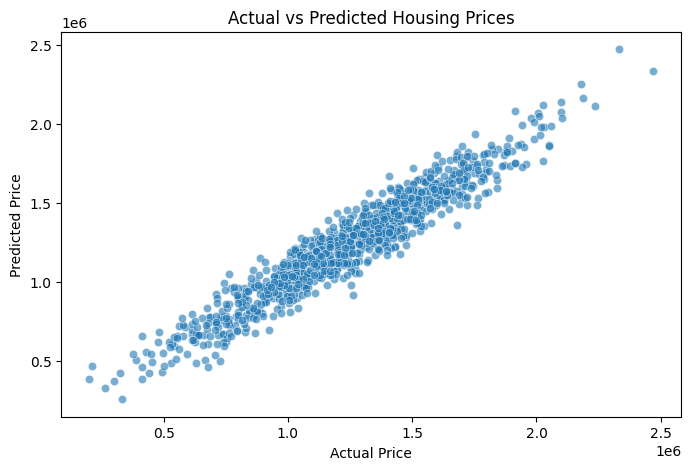

In [ ]:
plt.figure(figsize=(8,5))
# Create a scatter plot comparing actual (y_test) vs predicted (y_pred) house prices to visualize model accuracy
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.savefig('scatterplot.png')


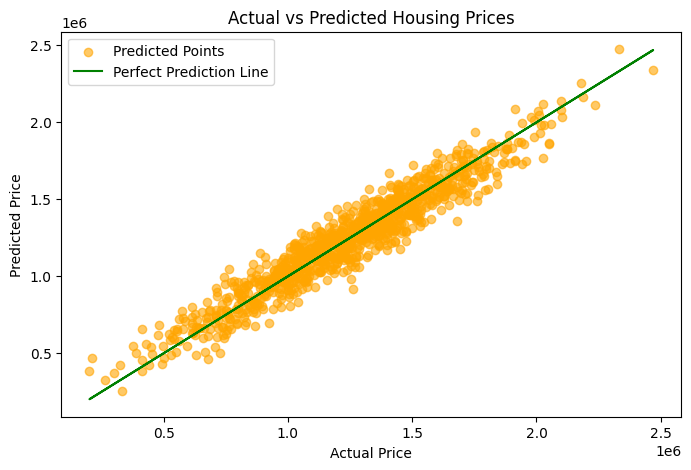

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='orange', alpha=0.6, label='Predicted Points')
plt.plot(y_test, y_test, color='green', label='Perfect Prediction Line')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.show()


In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                                Coefficient
Avg. Area Income              231741.876652
Avg. Area House Age           163580.776566
Avg. Area Number of Rooms     120724.771387
Avg. Area Number of Bedrooms    2992.449135
Area Population               152235.900097


In [ ]:
print(df)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4.09     2308

In [ ]:
# Ask user for input feature values
income = float(input("Enter Avg. Area Income: "))
age = float(input("Enter Avg. Area House Age: "))
rooms = float(input("Enter Avg. Area Number of Rooms: "))
bedrooms = float(input("Enter Avg. Area Number of Bedrooms: "))
population = float(input("Enter Area Population: "))

# Create a DataFrame from user input
new_data = pd.DataFrame({
    'Avg. Area Income': [income],
    'Avg. Area House Age': [age],
    'Avg. Area Number of Rooms': [rooms],
    'Avg. Area Number of Bedrooms': [bedrooms],
    'Area Population': [population]
})

# Scale the input using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Predict the house price
predicted_price = model.predict(new_data_scaled)

# Display the result
print(f"\n🏠 Predicted House Price: ${int(predicted_price[0])}")

rupees = int(predicted_price[0]) * 84  # convert USD to INR
print(f"🏠 Predicted House Price in Rupees: ₹{rupees:,}")


Enter Avg. Area Income: 80000
Enter Avg. Area House Age: 4
Enter Avg. Area Number of Rooms: 4
Enter Avg. Area Number of Bedrooms: 1
Enter Area Population: 18000

🏠 Predicted House Price: $511571
🏠 Predicted House Price in Rupees: ₹42,971,964
